# Lab.2: Document structure

## Authors: Edison Bejarano - Roberto Ariosa
### Requirements for the lab
  - import nltk
  - nltk.download('punkt')
  - test-gold.tgz
### Statement:

1. Read all pairs of sentences of the SMTeuroparl files of test set within the evaluation framework of the project.

2. Compute their similarities by considering words and Jaccard distance. A distance should be obtained for each pair of sentences (a vector of similarities).

3. Compare the previous results with gold standard by giving the pearson correlation between them. Only a global measure should be obtained from all previous distances.
from scipy.stats import pearsonr 
pearsonr(refs, tsts)[0]



In [ ]:
!pip install -q pingouin

In [1]:
# Import libraries
import os
import nltk
import pandas as pd
import seaborn as sns
import urllib.request
import pingouin as pg
import matplotlib.pyplot as plt
import string

from glob import glob 
from bs4 import BeautifulSoup
from scipy.stats import pearsonr


nltk.download('gutenberg')
nltk.download('stopwords')

ModuleNotFoundError: ignored

In [ ]:
# ------------------------------ #
# Downloading punkt
# ------------------------------ #
nltk.download('punkt')

# ------------------------------ #
# Path test gold directory
# ------------------------------ #
path = '/content/drive/MyDrive/Colab Notebooks/IHLT/test-gold'

# ------------------------------ #
# Getting all the files from the directory
# ------------------------------ #
listGold = os.listdir(path)
listGold

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['00-readme.txt',
 'STS.gs.SMTeuroparl.txt',
 'STS.gs.ALL.txt',
 'STS.gs.MSRpar.txt',
 'STS.gs.MSRvid.txt',
 'STS.gs.surprise.OnWN.txt',
 'STS.gs.surprise.SMTnews.txt',
 'STS.input.MSRpar.txt',
 'STS.input.MSRvid.txt',
 'STS.input.SMTeuroparl.txt',
 'STS.input.surprise.OnWN.txt',
 'STS.input.surprise.SMTnews.txt']

In [ ]:
# ------------------------------ #
# Similarity Function
# ------------------------------ #
def jaccard_similarity(s1, s2):
  intersection = len(s1.intersection(s2))
  union = len(s1) + len(s2) - intersection
  return float(intersection) / float(union)

### Pearson correlation including stopwords

In [ ]:
#--------------------------------------------#
# Reading SMTeuroparl inputs and gold scores
#--------------------------------------------#
df = pd.read_csv(path+"/"+listGold[9],sep='\t',header=None)

#--------------------------------------------#
# Importing the gold score data
#--------------------------------------------#
df['Gold_Score'] = pd.read_csv(path+"/"+listGold[1], sep='\t', header=None)
df.columns = ['Text1', 'Text2','Gold_Score']

#--------------------------------------------#
# Tokenize both columns that contain text
#--------------------------------------------#
df['text1_tokenized'] = [nltk.word_tokenize(phrase) for phrase in df['Text1']]
df['text2_tokenized'] = [nltk.word_tokenize(phrase) for phrase in df['Text2']]

#--------------------------------------------#
#Compute the jaccard similarity between 
#text1 and text2
#--------------------------------------------#
df['similarity'] = [jaccard_similarity(set(row['text1_tokenized']), set(row['text2_tokenized'])) for i,row in df.iterrows()]

#--------------------------------------------#
# Pearson Correlation
#--------------------------------------------#
pearson_corr = pearsonr(df['similarity'], df['Gold_Score'])
print(f'The pearson correlation between these text is : {pearson_corr[0]}')
print(pg.corr(x=df['Gold_Score'], y=df['similarity']))

df.head()

The pearson correlation between these text is : 0.45049771693186846
           n         r         CI95%         p-val       BF10  power
pearson  459  0.450498  [0.37, 0.52]  2.535646e-24  1.512e+21    1.0


,Text1,Text2,Gold_Score,text1_tokenized,text2_tokenized,similarity
0,The leaders have now been given a new chance a...,The leaders benefit aujourd' hui of a new luck...,4.50,"[The, leaders, have, now, been, given, a, new,...","[The, leaders, benefit, aujourd, ', hui, of, a...",0.346154
1,Amendment No 7 proposes certain changes in the...,Amendment No 7 is proposing certain changes in...,5.00,"[Amendment, No, 7, proposes, certain, changes,...","[Amendment, No, 7, is, proposing, certain, cha...",0.785714
2,Let me remind you that our allies include ferv...,I would like to remind you that among our alli...,4.25,"[Let, me, remind, you, that, our, allies, incl...","[I, would, like, to, remind, you, that, among,...",0.391304
3,The vote will take place today at 5.30 p.m.,The vote will take place at 5.30pm,4.50,"[The, vote, will, take, place, today, at, 5.30...","[The, vote, will, take, place, at, 5.30pm]",0.545455
4,"The fishermen are inactive, tired and disappoi...","The fishermen are inactive, tired and disappoi...",5.00,"[The, fishermen, are, inactive, ,, tired, and,...","[The, fishermen, are, inactive, ,, tired, and,...",1.000000


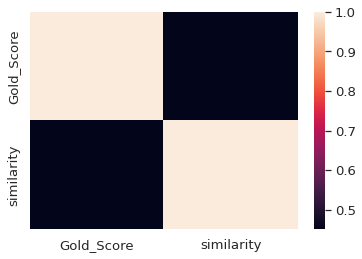

In [ ]:
#----------------------#
# Heatmap Correlation
#----------------------#
cormat = df.corr()
round(cormat,2)
sns.heatmap(cormat)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


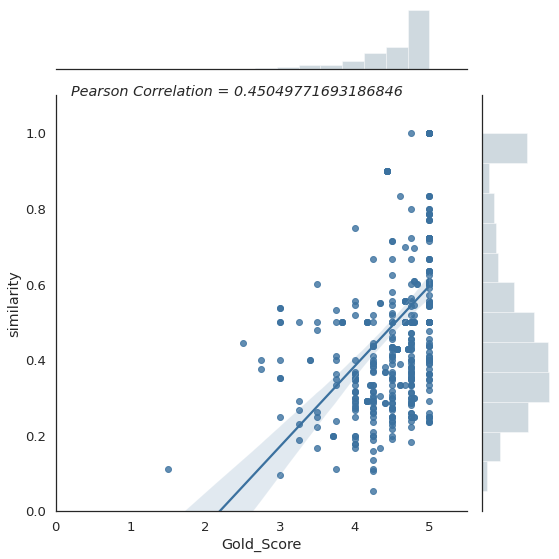

In [ ]:
#-------------------------#
# Gold score vs Similarity
#-------------------------#
sns.set(style='white', font_scale=1.2)
g = sns.JointGrid(data=df, x='Gold_Score', y='similarity', xlim=(0, 5.5), ylim=(0, 1.1), height=8)
g = g.plot_joint(sns.regplot, color="xkcd:muted blue")
g = g.plot_marginals(sns.distplot, kde=False, bins=12, color="xkcd:bluey grey")
g.ax_joint.text(0.2, 1.1, f'Pearson Correlation = {pearson_corr[0]}', fontstyle='italic')
plt.tight_layout()

### Pearson correlation without punctuations

In [ ]:
stopwords = nltk.corpus.stopwords.words("english")
len(stopwords)
stopwords[:10]
stopwords += string.punctuation
stopwords += ['.', ',', ';', '."']

In [ ]:
#--------------------------------------------#
# Reading SMTeuroparl inputs and gold scores
#--------------------------------------------#
df = pd.read_csv(path+"/"+listGold[9],sep='\t',header=None)

#--------------------------------------------#
# Importing the gold score data
#--------------------------------------------#
df['Gold_Score'] = pd.read_csv(path+"/"+listGold[1], sep='\t', header=None)
df.columns = ['Text1', 'Text2','Gold_Score']

#--------------------------------------------#
# Tokenize both columns that contain text
#--------------------------------------------#
df['text1_tokenized'] = [nltk.word_tokenize(phrase) for phrase in df['Text1']]
df['text2_tokenized'] = [nltk.word_tokenize(phrase) for phrase in df['Text2']]

#--------------------------------------------#
# Remove the stopwords
#--------------------------------------------#
dt1 = []
dt2 = []

for i in range(len(df)):
  dt1.append([w for w in df['text1_tokenized'][i] if not w.lower() in stopwords])
  dt2.append([w for w in df['text1_tokenized'][i] if not w.lower() in stopwords])

df['stopwords1'] = dt1
df['stopwords2'] = dt2

#--------------------------------------------#
# Compute the jaccard similarity between text1 and text2
#--------------------------------------------#
df['similarity'] = [jaccard_similarity(set(row['text1_tokenized']), set(row['text2_tokenized'])) for i,row in df.iterrows()]

#--------------------------------------------#
# Compute the jaccard similarity between text1 and text2 without stopwords
#--------------------------------------------#
df['similarityStopWords'] = [jaccard_similarity(set(row['stopwords1']), set(row['stopwords2'])) for i,row in df.iterrows()]

#--------------------------------------------#
# Pearson Correlation between text 1 and text 2
#--------------------------------------------#

print('Correlation between text1 and text2')
pearson_corr = pearsonr(df['Gold_Score'], df['similarity'])
print(f'The pearson correlation between these text is : {pearson_corr[0]}')
print(pg.corr(x=df['Gold_Score'], y=df['similarity']))

print('* ------------------------------------------------------- *\n')
print('Correlation between text1 and text2 without stopwords:')
pearson_corr = pearsonr(df['Gold_Score'], df['similarityStopWords'])
print(f'The pearson correlation between these text is : {pearson_corr[0]}')
print(pg.corr(x=df['Gold_Score'], y=df['similarityStopWords']))

print('* ------------------------------------------------------- *\n')
df.head()

Correlation between text1 and text2
The pearson correlation between these text is : 0.45049771693186846
           n         r         CI95%         p-val       BF10  power
pearson  459  0.450498  [0.37, 0.52]  2.535646e-24  1.512e+21    1.0
* ------------------------------------------------------- *

Correlation between text1 and text2 without stopwords:
The pearson correlation between these text is : nan
           n   r  CI95%  p-val  BF10  power
pearson  459 NaN    NaN    NaN   NaN    NaN
* ------------------------------------------------------- *



/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


,Text1,Text2,Gold_Score,text1_tokenized,text2_tokenized,stopwords1,stopwords2,similarity,similarityStopWords
0,The leaders have now been given a new chance a...,The leaders benefit aujourd' hui of a new luck...,4.50,"[The, leaders, have, now, been, given, a, new,...","[The, leaders, benefit, aujourd, ', hui, of, a...","[leaders, given, new, chance, let, us, hope, s...","[leaders, given, new, chance, let, us, hope, s...",0.346154,1.0
1,Amendment No 7 proposes certain changes in the...,Amendment No 7 is proposing certain changes in...,5.00,"[Amendment, No, 7, proposes, certain, changes,...","[Amendment, No, 7, is, proposing, certain, cha...","[Amendment, 7, proposes, certain, changes, ref...","[Amendment, 7, proposes, certain, changes, ref...",0.785714,1.0
2,Let me remind you that our allies include ferv...,I would like to remind you that among our alli...,4.25,"[Let, me, remind, you, that, our, allies, incl...","[I, would, like, to, remind, you, that, among,...","[Let, remind, allies, include, fervent, suppor...","[Let, remind, allies, include, fervent, suppor...",0.391304,1.0
3,The vote will take place today at 5.30 p.m.,The vote will take place at 5.30pm,4.50,"[The, vote, will, take, place, today, at, 5.30...","[The, vote, will, take, place, at, 5.30pm]","[vote, take, place, today, 5.30, p.m]","[vote, take, place, today, 5.30, p.m]",0.545455,1.0
4,"The fishermen are inactive, tired and disappoi...","The fishermen are inactive, tired and disappoi...",5.00,"[The, fishermen, are, inactive, ,, tired, and,...","[The, fishermen, are, inactive, ,, tired, and,...","[fishermen, inactive, tired, disappointed]","[fishermen, inactive, tired, disappointed]",1.000000,1.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


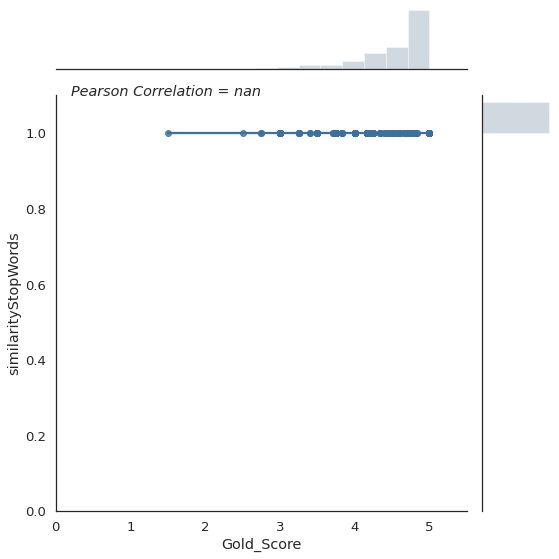

In [ ]:
#------------------------------------------#
# Gold score vs Similarity witout stopwords
#------------------------------------------#

sns.set(style='white', font_scale=1.2)
g = sns.JointGrid(data=df, x='Gold_Score', y='similarityStopWords', xlim=(0, 5.5), ylim=(0, 1.1), height=8)
g = g.plot_joint(sns.regplot, color="xkcd:muted blue")
g = g.plot_marginals(sns.distplot, kde=False, bins=12, color="xkcd:bluey grey")
g.ax_joint.text(0.2, 1.1, f'Pearson Correlation = {pearson_corr[0]}', fontstyle='italic')
plt.tight_layout()

### Conclusions



- As a main result in this practice, it was understood that it is possible to measure the similarity between different texts and get a correlation between all of them. 

- Another important result, was that in Pearson's correlation, the result for text1 and text2, given their similarity and gold score was "0.45". That means that they are correlated but have multiple differences in 55% over 459 instances.

- Jaccard similarity it was very important to get how much one text have some relation with 
 other. 

- To solve this laboratory, it was planned the following steps:
  
  1. Read the input and gs files
  2. Take the columns with the text disired and tokenize it by words
  3. Compute the similarity between all of text
  4. Compute the Pearson's correlation
  5. Plot the similarity and golg score

  To improve the results and explore a lit of bit, it was added another steps:

  1. Read the input and gs files
  2. Take the columns with the text disired and tokenize it by words
  3. Remove the stopwords
  4. Compute the similarity between all of text
  5. Compute the Pearson's correlation
  6. Plot the Gold score and similarity


- To improve the score obtained previosly of "0.45", it was planned to explore removing 
stopwords and compute the similarity and them the Pearson's correlation, in where it was percibe that the similarity was 1 for all the text compared, with that, our new Pearson's correlation was NaN. All of these, means that the main difference in the words it was stopwords.
